# Predicting House Sale Prices

I explored how the linear regression model worked, understood how the two different approaches to model fitting worked, and learned some techniques for cleaning, transforming, and selecting features. In this project, I can practice what I learned.

I'll work with housing data for the city of Ames, Iowa, United States from 2006 to 2010 with the goal of predict the prices.

## Introduction

For now I'll import the needed libraries, I'll read the dataset and create the skeleton of 3 functions that I'll expand later.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
pd.options.display.max_columns = 999

In [2]:
data = pd.read_csv('AmesHousing.tsv', delimiter="\t")

In [3]:
def transform_features(df):
    return df

In [4]:
def select_features(df):
    return df.loc[:,["Gr Liv Area", "SalePrice"]]

In [5]:
def train_and_test(df):
    train = df[0:1460]
    test = df[1460:]
    numerical_train=select_features(df).select_dtypes(include=np.number).drop("SalePrice", axis=1)
    features=numerical_train.columns
    lr = LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    predictions_test = lr.predict(test[features])
    test_mse=mean_squared_error(test["SalePrice"], predictions_test)
    test_rmse=test_mse**(1/2)
    return test_rmse

In [6]:
print(train_and_test(data))

57088.25161263909


## Feature Engineering

Handle missing values:

- Drop any column with 5% or more missing values for now.
- For columns with less missing values, fill in with the most common value in that column.

In [7]:
train=data[0:1460]
nans=train.isnull().sum()
cols_to_drop=nans[nans>(len(train)//20)].index
train2=train.drop(cols_to_drop, axis=1)
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
Order              1460 non-null int64
PID                1460 non-null int64
MS SubClass        1460 non-null int64
MS Zoning          1460 non-null object
Lot Area           1460 non-null int64
Street             1460 non-null object
Lot Shape          1460 non-null object
Land Contour       1460 non-null object
Utilities          1460 non-null object
Lot Config         1460 non-null object
Land Slope         1460 non-null object
Neighborhood       1460 non-null object
Condition 1        1460 non-null object
Condition 2        1460 non-null object
Bldg Type          1460 non-null object
House Style        1460 non-null object
Overall Qual       1460 non-null int64
Overall Cond       1460 non-null int64
Year Built         1460 non-null int64
Year Remod/Add     1460 non-null int64
Roof Style         1460 non-null object
Roof Matl          1460 non-null object
Exterior 1st       14

In [8]:
nans2=train2.isnull().sum()
cols_few_nans=nans2[(nans2<(len(train)//20))&(nans2>0)].index
print(cols_few_nans)

Index(['Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath',
       'Bsmt Half Bath'],
      dtype='object')


In [9]:
train3=train2.copy()
for column in cols_few_nans:
    train3[column].fillna(train3[column].mode()[0], inplace=True)
print(train3.isnull().sum())

Order              0
PID                0
MS SubClass        0
MS Zoning          0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
                  ..
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
Kitchen Qual       0
TotRms AbvGrd      0
Functional         0
Fireplaces         0
Garage Cars        0
Garage Area  

In [10]:
print(train3.isnull().sum().sum())

0


What new features can we create, that better capture the information in some of the features?

In [11]:
train4=train3.copy()
train4["years_until_remod"]=train4['Yr Sold']-train4['Year Remod/Add']
values_remod=train4["years_until_remod"].value_counts().sort_values()
print(values_remod)

22     4
24     4
57     5
27     6
26     7
28     7
23     7
25     9
36    10
21    10
29    10
19    10
20    11
34    11
41    11
46    11
55    12
56    12
54    12
38    13
37    13
45    13
43    13
47    13
49    13
18    13
52    14
35    15
53    15
40    16
      ..
48    16
44    17
17    18
42    19
33    19
32    20
15    20
30    20
31    21
51    22
16    23
39    25
13    27
12    31
14    31
11    35
10    37
60    42
7     42
9     44
8     50
6     50
5     55
2     55
58    55
3     58
4     59
0     60
1     75
59    78
Name: years_until_remod, Length: 61, dtype: int64


In [12]:
train4["years_before_sale"] = train4['Yr Sold']-train4['Year Built']
values_sold=train4["years_before_sale"].value_counts().sort_values()
print(values_sold)

136     1
117     1
127     1
128     1
125     1
120     1
97      1
102     1
115     1
114     1
111     1
75      1
107     1
135     1
104     1
77      2
96      2
119     2
92      2
129     2
118     2
65      3
23      3
24      3
27      3
91      3
72      3
103     3
64      3
74      4
       ..
52     18
49     18
40     18
50     19
12     19
43     19
13     19
60     19
30     20
48     21
53     21
15     22
33     22
31     24
8      24
0      24
11     24
39     26
42     26
10     28
3      29
32     29
51     30
9      30
7      32
4      36
2      36
5      45
6      46
1      74
Name: years_before_sale, Length: 119, dtype: int64


Which columns need to be dropped for other reasons?

- Which columns aren't useful for machine learning?
- Which columns leak data about the final sale?

In [13]:
train5=train4.copy()
cols_to_drop=["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"]
train5=train5.drop(cols_to_drop, axis=1)
train5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 67 columns):
MS SubClass          1460 non-null int64
MS Zoning            1460 non-null object
Lot Area             1460 non-null int64
Street               1460 non-null object
Lot Shape            1460 non-null object
Land Contour         1460 non-null object
Utilities            1460 non-null object
Lot Config           1460 non-null object
Land Slope           1460 non-null object
Neighborhood         1460 non-null object
Condition 1          1460 non-null object
Condition 2          1460 non-null object
Bldg Type            1460 non-null object
House Style          1460 non-null object
Overall Qual         1460 non-null int64
Overall Cond         1460 non-null int64
Year Built           1460 non-null int64
Year Remod/Add       1460 non-null int64
Roof Style           1460 non-null object
Roof Matl            1460 non-null object
Exterior 1st         1460 non-null object
Exterior 2nd     

## Feature Selection

It's now time to move on to select the most useful features.  

In [14]:
import seaborn as sns
%matplotlib inline

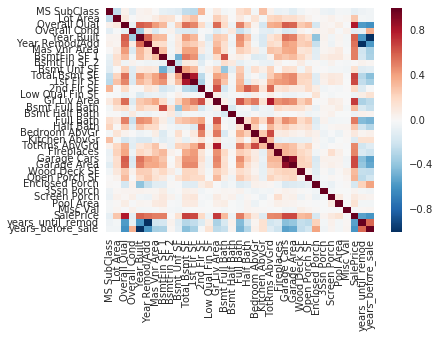

In [15]:
corrmat=train5.corr()
sns.heatmap(corrmat)
plt.show()

I should keep the columns most correlated with the target (the "price" column). Since a negative correlation is fine as well let's sort the columns by the absolute value of correlation coefficient and make a ranking.

In [16]:
sorted_corrs=train5.corr().abs().loc[:,"SalePrice"].sort_values(ascending=False)
print(sorted_corrs.head(20))

SalePrice            1.000000
Overall Qual         0.804562
Gr Liv Area          0.698990
Total Bsmt SF        0.682986
Garage Cars          0.663485
Garage Area          0.662397
1st Flr SF           0.657119
years_before_sale    0.592273
Year Built           0.591436
years_until_remod    0.546212
Year Remod/Add       0.545219
Full Bath            0.518194
Mas Vnr Area         0.513787
BsmtFin SF 1         0.513579
Fireplaces           0.485683
TotRms AbvGrd        0.483701
Open Porch SF        0.344383
Wood Deck SF         0.319104
Bsmt Full Bath       0.315024
Lot Area             0.274730
Name: SalePrice, dtype: float64


In [17]:
numerical_cols=train5.select_dtypes(include=np.number).columns
print(len(numerical_cols))

35


In [18]:
categ_cols=[]
for column in train5.columns:
    n_unique_values=len(train5[column].value_counts())
    if n_unique_values<10:
        categ_cols.append(column)
print(categ_cols)
print(len(categ_cols))

['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Cond', 'Roof Style', 'Roof Matl', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'Functional', 'Fireplaces', 'Garage Cars', 'Paved Drive', 'Pool Area']
39


In [19]:
categ_cols_num=[]
for column in numerical_cols:
    n_unique_values=len(train5[column].value_counts())
    if n_unique_values<15:
        categ_cols_num.append(column)
print(categ_cols_num)
print(len(categ_cols_num))

['Overall Qual', 'Overall Cond', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Pool Area']
12


In [20]:
cols_low_variance=[]
for column in categ_cols:
    first_value=train5[column].value_counts().sort_values(ascending=False).iloc[0]
    ratio=first_value/train5[column].value_counts().sum()
    if ratio>0.90:
        cols_low_variance.append(column)
print(cols_low_variance)
print(len(cols_low_variance))

['Street', 'Land Contour', 'Utilities', 'Land Slope', 'Condition 2', 'Roof Matl', 'Bsmt Cond', 'Heating', 'Central Air', 'Electrical', 'Bsmt Half Bath', 'Kitchen AbvGr', 'Functional', 'Paved Drive', 'Pool Area']
15


In [21]:
potential_features=sorted_corrs[sorted_corrs>0.4].index
print(potential_features)
print(len(potential_features))

Index(['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Total Bsmt SF',
       'Garage Cars', 'Garage Area', '1st Flr SF', 'years_before_sale',
       'Year Built', 'years_until_remod', 'Year Remod/Add', 'Full Bath',
       'Mas Vnr Area', 'BsmtFin SF 1', 'Fireplaces', 'TotRms AbvGrd'],
      dtype='object')
16


In [22]:
string_cols=train5.select_dtypes(include=['object']).columns
print(len(string_cols))

32


In [23]:
categ_cols_str=[]
for column in string_cols:
    n_unique_values=len(train5[column].value_counts())
    if n_unique_values<10:
        categ_cols_str.append(column)
    else:
        print(column)
print(categ_cols_str)
print(len(categ_cols_str))

Neighborhood
Exterior 1st
Exterior 2nd
['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Paved Drive']
29


In [24]:
cat_to_del=[]
potential_features_str=[]
for col in categ_cols_str:
    if col in cols_low_variance:
        cat_to_del.append(col)
    else:
        potential_features_str.append(col)
print(potential_features_str)

['MS Zoning', 'Lot Shape', 'Lot Config', 'Condition 1', 'Bldg Type', 'House Style', 'Roof Style', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Kitchen Qual']


In [25]:
potential_features_list=list(potential_features)
print(potential_features_list)

['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', 'Garage Cars', 'Garage Area', '1st Flr SF', 'years_before_sale', 'Year Built', 'years_until_remod', 'Year Remod/Add', 'Full Bath', 'Mas Vnr Area', 'BsmtFin SF 1', 'Fireplaces', 'TotRms AbvGrd']


In [26]:
potential_features_list.remove('Overall Qual')
print(potential_features_list)

['SalePrice', 'Gr Liv Area', 'Total Bsmt SF', 'Garage Cars', 'Garage Area', '1st Flr SF', 'years_before_sale', 'Year Built', 'years_until_remod', 'Year Remod/Add', 'Full Bath', 'Mas Vnr Area', 'BsmtFin SF 1', 'Fireplaces', 'TotRms AbvGrd']


In [27]:
potential_features_str.append('Overall Qual')
print(potential_features_str)

['MS Zoning', 'Lot Shape', 'Lot Config', 'Condition 1', 'Bldg Type', 'House Style', 'Roof Style', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Kitchen Qual', 'Overall Qual']


## Train and Test

Up to now I have cleaned the dataset and selected the more suitable features. 

Now it's time of training and testing. When iterating on different features, using simple validation is a good idea. Let's add a parameter named k that controls the type of cross validation that occurs.

In [28]:
from sklearn.model_selection import KFold

def transform_features(df):
    nans=df.isnull().sum()
    cols_to_drop=nans[nans>(len(train)//20)].index
    train2=df.drop(cols_to_drop, axis=1)
    
    nans2=train2.isnull().sum()
    cols_few_nans=nans2[(nans2<(len(train)//20))&(nans2>0)].index
    
    train3=train2.copy()
    for column in cols_few_nans:
        train3[column].fillna(train3[column].mode()[0], inplace=True)
    
    train4=train3.copy()
    train4["years_until_remod"]=train4['Yr Sold']-train4['Year Remod/Add']
    values_remod=train4["years_until_remod"].value_counts().sort_values()
    
    train4["years_before_sale"] = train4['Yr Sold']-train4['Year Built']
    values_sold=train4["years_before_sale"].value_counts().sort_values()
    
    train4 = train4.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Year Built", "Year Remod/Add"], axis=1)
    return train4

def select_features(df, coeff_threshold=0.4, uniq_threshold=10):
    numerical_df = df.select_dtypes(include=['int', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)

    uniqueness_counts = df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
    df = df.drop(drop_nonuniq_cols, axis=1)
    
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1).drop(text_cols,axis=1)
    
    return df

def train_and_test(df, k=0):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    lr = LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    if k == 1:
        shuffled_df = df.sample(frac=1, )
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        return avg_rmse
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse

data = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_data = transform_features(data)
filtered_data = select_features(transform_data)
for k in range(6):
    rmse = train_and_test(filtered_data, k)
    print(rmse)


38399.72585731075
35553.57082200654
33234.374512600494
32070.175270320964
31304.787156384104
31164.782785035204
